In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import g3py as g3


g3.style_seaborn()
g3.style_widget()

x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.35)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 108 (34.95145631067961%)


In [2]:
with g3.Model() as model:
    gp = g3.GaussianProcess(x, g3.Zero(), g3.SE(x), hidden=y)
    gp.describe('Sunspots','YEAR','SUNACTIVITY')
    gp.observed(x_obs,y_obs)
    gp.compile()

Space Dimensions:  (309, 1)
Inputs Dimensions:  (2, 1)
Output Dimensions:  (2,)
Compiling


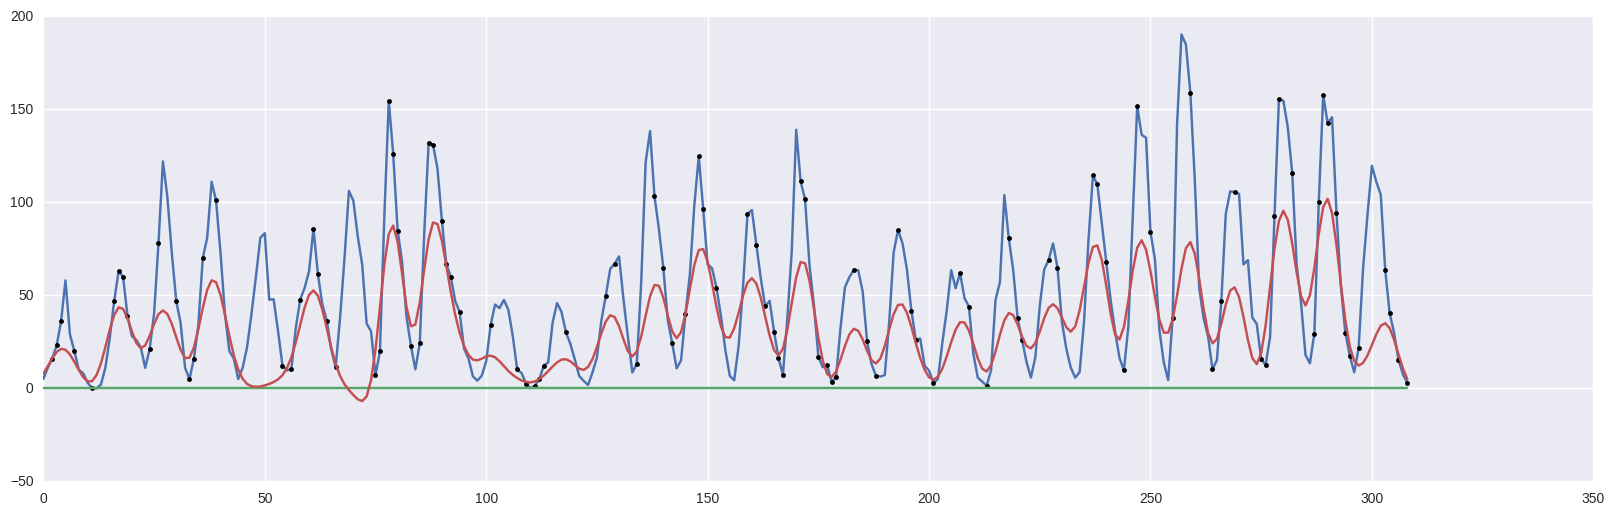

In [5]:
gp.plot_data()
g3.plot(gp.compiles['prior_mean'](x[:,None], **gp.get_params_default()))
g3.plot(gp.compiles['posterior_mean'](x[:,None], x_obs[:,None], y_obs, **gp.get_params_default()))